### Setup

In [ ]:
%pip install matplotlib
%pip install seaborn
%pip install ipympl
%pip install jupyter

import numpy as np
import pandas as pd
import ipympl
import matplotlib.pyplot as plt
import seaborn as sns

print(ipympl.__version__)

%matplotlib widget

### Import Data

In [ ]:
print(sns.get_dataset_names()) # list the available datasets

In [ ]:
crash_df = sns.load_dataset('car_crashes')
print(crash_df.head())

### Distribution Plot

### Joint Plot
Vergleich von zwei Verteilungen.
Mögliche Arten von Plots:
- reg -> Scatter mit Regressionslinie
- kde -> Dichtekonturen (Heatmap-ähnlich)
- hex -> Hexbin-Plot (Hexagonale Bins)
- scatter -> Standard Scatterplot
- hist -> Histogramm-Heatmap
- resid -> Residuen-Plot


In [ ]:
plot_type = ['reg', 'kde', 'hex', 'scatter', 'hist', 'resid'] # Liste mit allen Plot Typen
for kind in plot_type:
    plot = sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind=kind) # Erstellt alle Plots aus der Liste
    plot.figure.suptitle(f"Jointplot - {kind}", fontsize=16, fontweight='bold') # Setzt den Titel für jeden Plot
    plot.figure.subplots_adjust(top=0.9) # Setzt den Abstand zwischen den Plots


### KDE Plot
Ein KDE-Plot (Kernel Density Estimation Plot) ist eine Methode zur Visualisierung der Wahrscheinlichkeitsverteilung einer kontinuierlichen Variable. Sie erstellt die glatte Vertielung von Daten dar, anstatt sie als Balken wie in einem Historgramm anzuzeigen.

Was macht ein KDE-Plot?
- Er schätzt die Wahrscheinlichkeitsdichte einer Variable.
- Statt wie Balkn (wie im Histogramm) wird eine glatte Linie gezeichnet.
- Die Fläche unter der Kurve beträgt immer 1, da sie eine Wahrscheinlichkeitsverteilung darstellt.

Histogramm vs. KDE
- Histogramm zeigt die Verteilung als Balken, der KDE-Plot darüber als Linie.

#### Warum KDE statt Histogramm?

| Feature        | Histogramm 🏗 | KDE-Plot 📈 |
|--------------|--------------|-----------|
| **Darstellung** | Zeigt Werte in festen **Balken** | Zeigt eine **glatte Kurve** |
| **Flexibilität** | Abhängig von der `bins`-Anzahl | Automatische Schätzung der Dichte |
| **Visualisierung** | Kann stufig wirken | Weiche Übergänge zwischen Bereichen |
| **Nützlich für** | Wenn exakte Häufigkeiten gewünscht sind | Wenn die Gesamtverteilung klar erkennbar sein soll |

In [ ]:
# Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
plt.figure()

# KDE-Plot zeichnen
sns.kdeplot(crash_df['alcohol'])
plt.show()

### Pair Plots (Paarweise Diagramme)

Ein **Pair Plot** (`sns.pairplot()`) visualisiert **Beziehungen zwischen mehreren numerischen Variablen** in einem Dataset.  
Dabei werden **alle Variablen paarweise** als Scatterplots dargestellt, während die Diagonale oft ein Histogramm oder eine KDE-Dichtekurve zeigt.

#### Vorteile:
- Zeigt **Zusammenhänge zwischen Variablen** in einer einzigen Visualisierung.
- Erkennt **lineare oder nicht-lineare Beziehungen** zwischen Features.
- Hilft, **Ausreißer und Cluster** zu identifizieren.

#### Wichtige Parameter:
- **`hue='category'`** → Färbt die Punkte basierend auf einer kategorialen Variable, um Gruppen zu unterscheiden.  
  _(z. B. `hue='gender'` markiert Männer und Frauen unterschiedlich)_
- **`palette='Set2'`** → Bestimmt die Farbpalette für unterschiedliche Gruppen, wenn `hue` verwendet wird.  
  _(Alternativen: `'coolwarm'`, `'viridis'`, `'pastel'`, `'deep'`, etc.)_
- **`kind='reg'`** → Fügt Regressionslinien hinzu, um lineare Zusammenhänge zu erkennen.
- **`diag_kind='kde'`** → Zeigt Dichtekurven statt Histogrammen für eine bessere Visualisierung der Verteilung.
- **`markers=['o', 's', 'D']`** → Definiert verschiedene Marker-Stile für Gruppen in hue.
_(z. B. o = Kreis, s = Quadrat, D = Raute.)_
- **`height=2.5`** → Bestimmt die Größe jedes einzelnen Subplots im Pair Plot.
_(Standardwert ist 2.5, höhere Werte vergrößern die Plots.)_

In [ ]:
tips_df = sns.load_dataset('tips')

sns.pairplot(tips_df, hue='sex', palette='coolwarm', kind='scatter', diag_kind='kde', markers=['o', 's'], height=2.5)


### Rug Plot (Teppichdiagramm)

Ein **Rug Plot** (`sns.rugplot()`) ist eine einfache Visualisierung zur Darstellung der **Verteilung einzelner Datenpunkte** entlang einer Achse.  
Die Punkte werden als kleine **Striche ("Teppichstreifen") entlang der Achse** dargestellt, wodurch Muster und Dichten in den Daten sichtbar werden.

#### Vorteile

- Zeigt **exakte Positionen einzelner Datenpunkte**, anstatt sie in Bins wie beim Histogramm zu aggregieren.  
- Nützlich, um **Cluster, Lücken oder extreme Werte (Ausreißer)** zu erkennen.  
- Kann mit anderen Plots wie **Histogrammen, KDE-Plots oder Scatterplots** kombiniert werden, um zusätzliche Kontextinformationen bereitzustellen.  

#### Wichtige Parameter

- **`height=0.05`** → Bestimmt die Länge der Striche relativ zur Achse.  
  *(Ein niedrigerer Wert macht sie kürzer, Standardwert ist `0.05`.)*  
- **`hue='category'`** → Färbt die Striche basierend auf einer kategorialen Variable, um Gruppen zu unterscheiden.  
- **`palette='Set2'`** → Bestimmt die Farbpalette für verschiedene Gruppen, wenn `hue` verwendet wird.  
  *(Alternativen: `'coolwarm'`, `'viridis'`, `'pastel'`, `'deep'`, etc.)*  
- **`lw=1`** → Setzt die Breite der Striche.  
  *(Größere Werte machen die Striche dicker.)*  
- **`alpha=0.7`** → Bestimmt die Transparenz der Striche.  
  *(Werte zwischen `0.0` und `1.0`, wobei `1.0` vollständig sichtbar ist.)*  
- **`ax=ax`** → Ermöglicht das Platzieren des Rug Plots auf einem vorhandenen Matplotlib-Plot, um ihn mit anderen Visualisierungen zu kombinieren.  

Rug Plots sind besonders nützlich zur Darstellung der Rohdatenverteilung in Kombination mit KDE-Plots oder Histogrammen.


In [ ]:
# Lade das 'tips'-Dataset
tips = sns.load_dataset("tips")

# Erstelle die Figur und Achse
plt.figure(figsize=(8, 5))

# KDE-Plot für eine sanfte Verteilungskurve
sns.kdeplot(x=tips["total_bill"], hue=tips["sex"], fill=True, alpha=0.3, palette="coolwarm")

# Manuelles Jittering für den Rug Plot:
jitter_strength = 0.1  # Stärke der zufälligen Verschiebung
jittered_y = np.random.uniform(-jitter_strength, jitter_strength, size=len(tips["total_bill"]))

# Rug Plot mit verbesserten Parametern
sns.rugplot(
    x=tips["total_bill"], 
    hue=tips["sex"], 
    palette="coolwarm", 
    height=0.1,  # Kürzere Striche
    lw=1.2,  # Dünnere Linien für bessere Lesbarkeit
    alpha=0.5  # Leicht transparent, um Überlagerung zu reduzieren
)

# Punkte leicht nach oben/unten verschieben, um Überlappung zu vermeiden
plt.scatter(tips["total_bill"], jittered_y, alpha=0)  # Unsichtbare Punkte für Achsenerweiterung

# Titel und Labels setzen
plt.title("Rug Plot der Rechnungsbeträge (total_bill) nach Geschlecht", fontsize=14)
plt.xlabel("Rechnungsbetrag ($)")
plt.ylabel("Dichte")

# Zeige den Plot
plt.show()


### Styling von Seaborn-Plots

Seaborn bietet umfangreiche Möglichkeiten zur Anpassung des Stils von Diagrammen.  
Dazu gehören **Farbpaletten, Hintergründe, Schriftarten und Achseneinstellungen**, die das visuelle Erscheinungsbild von Plots verbessern.

#### 1. Setzen eines allgemeinen Stils

Seaborn stellt verschiedene vordefinierte Stile zur Verfügung:

- **`darkgrid`** → Standardstil mit grauem Gitter (ideal für explorative Analysen).
- **`whitegrid`** → Weißer Hintergrund mit Gitterlinien (gute Balance zwischen Übersichtlichkeit und Detail).
- **`dark`** → Dunkler Hintergrund ohne Gitterlinien.
- **`white`** → Minimalistischer Stil ohne Gitter.
- **`ticks`** → Ähnlich wie `white`, aber mit deutlicheren Achsenticks.

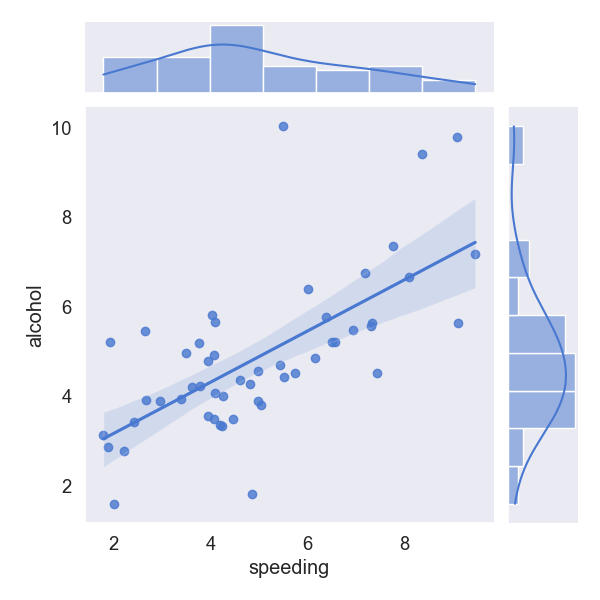

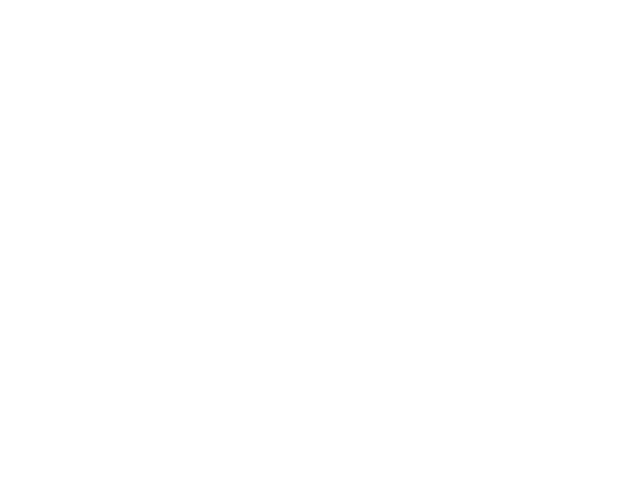

In [132]:
# Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
plt.figure()

tips_df = sns.load_dataset('tips') # Lade das 'tips'-Dataset
sns.set_style('dark') # Setzt den globalen Parameter für nachfolgende Plots die keinen eigenen Style haben
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'reg') # Erstellt den Pairplot
# ----------------- #

plt.show()

#### Farbschemata mit palette
Mit palette lassen sich **Farbschemata** definieren:

- Vordefinierte Paletten: 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'
- Sequentielle Paletten (für kontinuierliche Daten): 'Blues', 'BuGn', 'OrRd', 'coolwarm'
- Divergente Paletten (für zwei gegensätzliche Gruppen): 'RdBu_r', 'Spectral'
- Manuelle Anpassung mit Hex-Werten:

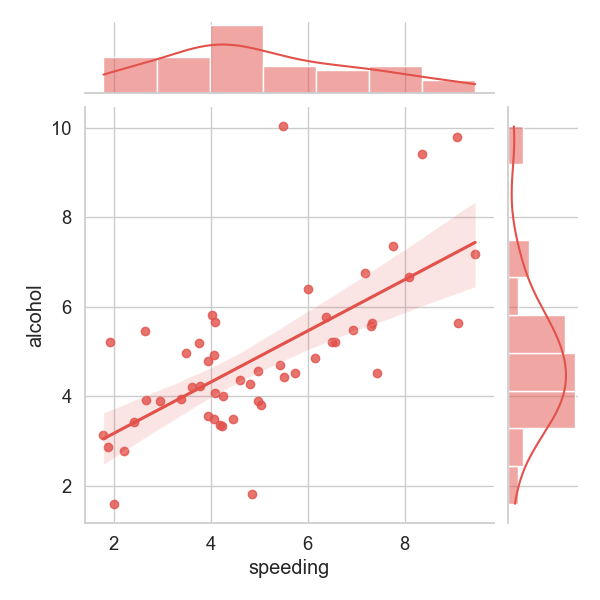

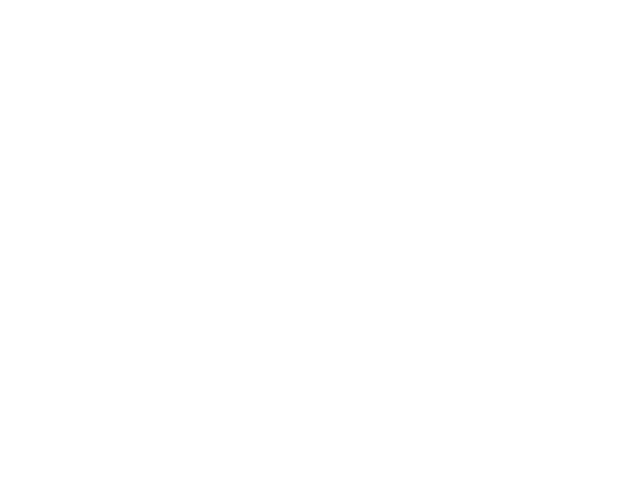

In [139]:
sns.set_palette('Spectral')  # Setzt eine globale Farbpalette für alle nachfolgenden Plots, die keine eigene palette haben
tips_df = sns.load_dataset('tips') # Lade das 'tips'-Dataset
plt.figure() # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'reg') # Erstellt den Pairplot
plt.show()

#### Skalierung des Plots mit context
Die Funktion sns.set_context() passt die Skalierung von Texten und Elementen an:

- paper → Kleinere Elemente für Berichte.
- notebook → Standardgröße für Jupyter Notebooks.
- talk → Größere Texte für Präsentationen.
- poster → Noch größere Beschriftungen für Poster.

In [ ]:
# Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
plt.figure()

tips_df = sns.load_dataset('tips') # Lade das 'tips'-Dataset
sns.set_context("poster")  # Vergrößert Labels und Achsenbeschriftungen für Präsentationen alternative Parameter: paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.2)  # Erhöht die Schriftgröße um 20 % gegenüber der Standardgröße
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'reg') # Erstellt den Pairplot
plt.show()

### Entfernen von Spines (Rahmenlinien)
Um den Plot minimalistisch zu gestalten, können die Rahmenlinien entfernt oder angepasst werden:

In [ ]:
sns.set_style("white")
sns.kdeplot(x=[1, 2, 2.5, 3, 4, 5], fill=True)
sns.despine()  # Entfernt obere und rechte Achsenlinie
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'reg') # Erstellt den Pairplot
plt.show()

### Kombination mehrerer Einstellungen
Seaborn-Stiloptionen können kombiniert werden, um ein einheitliches Design zu schaffen:

In [ ]:
sns.set_style("ticks") # Setzt den globalen Style auf 'whitegrid' alternative Styles: darkgrid, white, dark, ticks
plt.figure(figsize=(8, 5)) # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
sns.set_context("paper", font_scale=1.4)  # Setzt den globalen Parameter für nachfolgende Plots die keinen eigenen Context haben alternative Parameter: paper, notebook, talk, poster
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'reg') # Erstellt den Pairplot
sns.despine()  # Entfernt Achsenlinie alternative Parameter: left, bottom, top, right
plt.show()

### Categorical Plots 

### Bar Plots (Balkendiagramme)

Ein **Bar Plot** (`sns.barplot()`) stellt kategoriale Daten als Balkendiagramm dar.  
Dabei zeigt die x-Achse eine kategoriale Variable, während die y-Achse den Durchschnitt einer numerischen Variable angibt.

#### Vorteile:
- Aggregiert Daten automatisch und zeigt den **Mittelwert** der y-Werte für jede Kategorie.
- Zeigt **Konfidenzintervalle**, um Unsicherheiten zu visualisieren.
- Unterstützt Farbcodierung über `hue`, um Gruppen innerhalb einer Kategorie zu vergleichen.

| Parameter               | Beschreibung |
|-------------------------|-------------|
| **`x` / `y`**          | Definiert die kategoriale (`x`) und numerische (`y`) Achse. |
| **`hue`**              | Färbt Balken nach einer dritten kategorialen Variable. |
| **`palette`**          | Definiert das Farbschema (`"Blues"`, `"coolwarm"`, `"pastel"`, etc.). |
| **`ci`**               | Gibt das **Konfidenzintervall** für den Mittelwert an. Standard ist `ci=95` (95%-Intervall). |
| **`ci=sd`**            | Zeigt die **Standardabweichung** der Werte anstelle eines Konfidenzintervalls. |
| **`ci=None`**          | Entfernt das Konfidenzintervall und zeigt nur die Balken. |
| **`estimator`**        | Aggregiert die Werte für jede Kategorie. Standard ist `np.mean` (Mittelwert). |
| **`estimator=np.mean`** | Zeigt den **Mittelwert** pro Kategorie (Standardwert). |
| **`estimator=np.median`** | Zeigt den **Median** (Zentralwert) anstelle des Mittelwerts. |
| **`estimator=np.sum`** | Zeigt die **Gesamtsumme** der Werte pro Kategorie. |
| **`estimator=len`**    | Zeigt die **Anzahl der Werte** je Kategorie (z. B. Anzahl Bestellungen pro Tag). |
| **`estimator=np.min`** | Zeigt den **kleinsten Wert** pro Kategorie. |
| **`estimator=np.max`** | Zeigt den **größten Wert** pro Kategorie. |
| **`estimator=np.std`** | Zeigt die **Standardabweichung** der Werte pro Kategorie. |
| **`estimator=np.var`** | Zeigt die **Varianz** der Werte pro Kategorie. |
| **`estimator=lambda x: np.percentile(x, 25)`** | Zeigt das **25%-Quantil (unteres Quartil)** der Werte. |
| **`estimator=lambda x: np.percentile(x, 75)`** | Zeigt das **75%-Quantil (oberes Quartil)** der Werte. |
| **`order=['Thur', 'Fri', 'Sat', 'Sun']`** | Legt eine bestimmte Reihenfolge für die Kategorien auf der x-Achse fest. |

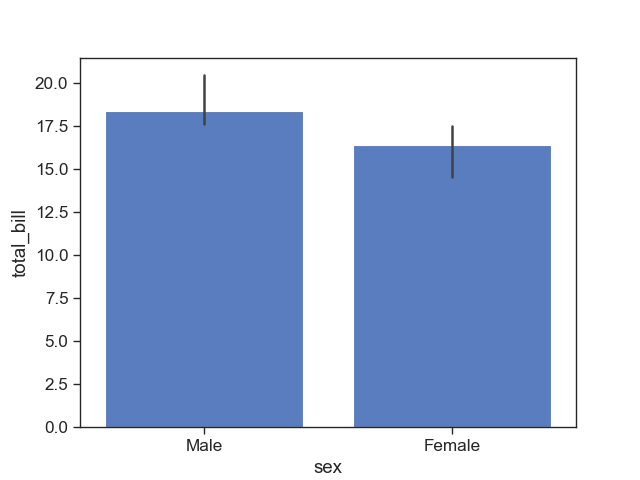

In [ ]:
plt.figure() # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median) # Erstellt den Barplot mit einem Estimator alternative Estimator: np, np.median, np.mean, np.std
# weitere alterantive Parameter: ci, capsize, dodge, palette, order, hue, orient, color
plt.show()